# Klasterovanje - 2. čas
# OPTICS - tumačenje reachability plota, nastavak

In [113]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import OPTICS, cluster_optics_dbscan

In [114]:
np.random.seed(0)
n_points_per_cluster = 250

In [115]:
C1 = [-5, -2] + 0.8 * np.random.randn(n_points_per_cluster, 2)
C2 = [4, -1] + 0.1 * np.random.randn(n_points_per_cluster, 2)
C3 = [1, -2] + 0.2 * np.random.randn(n_points_per_cluster, 2)
C4 = [-2, 3] + 0.3 * np.random.randn(n_points_per_cluster, 2)
C5 = [3, -2] + 1.6 * np.random.randn(n_points_per_cluster, 2)
C6 = [5, 6] + 2 * np.random.randn(n_points_per_cluster, 2)
X = np.vstack((C1, C2, C3, C4, C5, C6))

In [116]:
clust = OPTICS(min_samples=50, xi=0.05, min_cluster_size=0.05)
clust.fit(X)

OPTICS(min_cluster_size=0.05, min_samples=50)

In [117]:
labels_050 = cluster_optics_dbscan(
    reachability=clust.reachability_,
    core_distances=clust.core_distances_,
    ordering=clust.ordering_,
    eps=0.5,
)

In [118]:
labels_200 = cluster_optics_dbscan(
    reachability=clust.reachability_,
    core_distances=clust.core_distances_,
    ordering=clust.ordering_,
    eps=2,
)

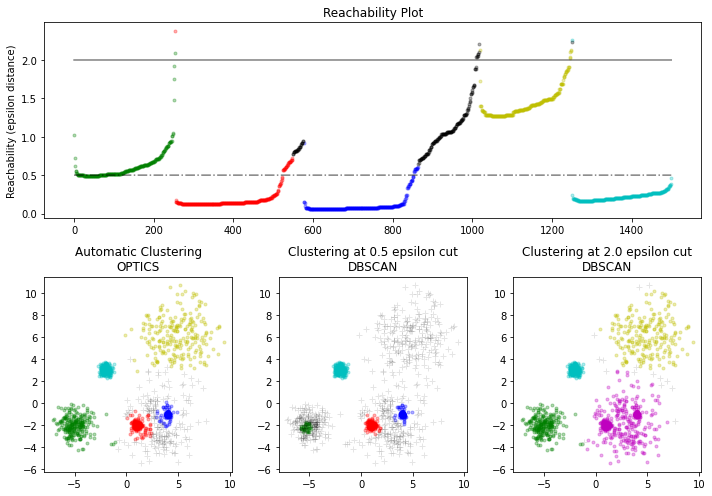

In [119]:
space = np.arange(len(X))
reachability = clust.reachability_[clust.ordering_]
labels = clust.labels_[clust.ordering_]

plt.figure(figsize=(10, 7))
G = gridspec.GridSpec(2, 3)
ax1 = plt.subplot(G[0, :])
ax2 = plt.subplot(G[1, 0])
ax3 = plt.subplot(G[1, 1])
ax4 = plt.subplot(G[1, 2])

colors = ["g.", "r.", "b.", "y.", "c."]
for klass, color in enumerate(colors):
    Xk = space[labels == klass]
    Rk = reachability[labels == klass]
    ax1.plot(Xk, Rk, color, alpha=0.3)
    
ax1.plot(space[labels == -1], reachability[labels == -1], "k.", alpha=0.3)
ax1.plot(space, np.full_like(space, 2.0, dtype=float), "k-", alpha=0.5)
ax1.plot(space, np.full_like(space, 0.5, dtype=float), "k-.", alpha=0.5)
ax1.set_ylabel("Reachability (epsilon distance)")
ax1.set_title("Reachability Plot")

# OPTICS
colors = ["g.", "r.", "b.", "y.", "c."]
for klass, color in enumerate(colors):
    Xk = X[clust.labels_ == klass]
    ax2.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax2.plot(X[clust.labels_ == -1, 0], X[clust.labels_ == -1, 1], "k+", alpha=0.1)
ax2.set_title("Automatic Clustering\nOPTICS")

# DBSCAN at 0.5
colors = ["g.", "r.", "b.", "c."]
for klass, color in enumerate(colors):
    Xk = X[labels_050 == klass]
    ax3.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax3.plot(X[labels_050 == -1, 0], X[labels_050 == -1, 1], "k+", alpha=0.1)
ax3.set_title("Clustering at 0.5 epsilon cut\nDBSCAN")

# DBSCAN at 2.
colors = ["g.", "m.", "y.", "c."]
for klass, color in enumerate(colors):
    Xk = X[labels_200 == klass]
    ax4.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax4.plot(X[labels_200 == -1, 0], X[labels_200 == -1, 1], "k+", alpha=0.1)
ax4.set_title("Clustering at 2.0 epsilon cut\nDBSCAN")

plt.tight_layout()
plt.show()

primetiti da su na poslednjem grafiku crveni i plavi klaster spojeni u jedan - ljubicasti klaster, zasto?

# Spektralno klasterovanje

Spektralno klasterovanje je efikasna metoda koja koristi povezanost između podataka, omogućavajući formiranje klastera koji se ne oslanjaju samo na udaljenost između tačaka, već i na to koliko su te tačke međusobno povezane unutar skupa podataka. Ovo je posebno korisno za podatke koji možda nisu dobro odvojeni u euklidskom prostoru, ali imaju značajne veze koje se mogu identifikovati kroz pristup zasnovan na grafovima.

Sastoji se iz sledećih koraka:

- formiranje grafa sličnosti podataka u zavisnosti od mere sličnosti (npr. Gausovo rastojanje - rbf kernel)

- formiranje laplasovog grafa na osnovu grafa sličnosti

- računanje sopstvenih vektora laplasovog grafa

- projektovanje podataka u prostor manjih dimenzija

- klasterovanje pomoću uobičajenih algoritama - npr. KMeans

In [122]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn import datasets

In [123]:
data = datasets.load_iris()

In [124]:
X_iris = data.data
y_iris = data.target

In [125]:
feature_names = data.feature_names
target_name = data.target_names

In [126]:
X_iris = pd.DataFrame(data=X_iris,columns=feature_names)
X_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [127]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_iris)
X_iris = scaler.transform(X_iris)

In [128]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_iris)
X_pca = pca.transform(X_iris)

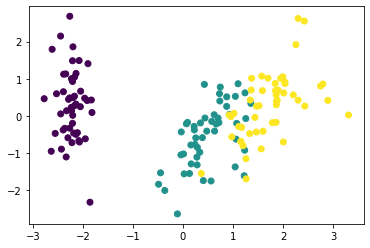

In [129]:
plt.scatter(X_pca[:,0],X_pca[:,1],c=y)

In [130]:
from sklearn.cluster import SpectralClustering

In [133]:
sc = SpectralClustering(n_clusters=3,)
sc.fit(X_iris)

SpectralClustering(n_clusters=3)

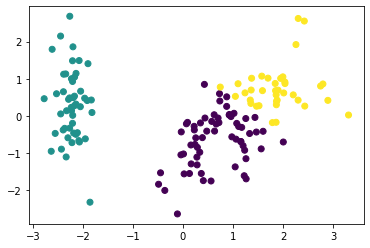

In [134]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=sc.labels_)

In [135]:
from sklearn.metrics import silhouette_score, homogeneity_score
silhouette_score(X_iris, sc.labels_, metric='euclidean')

0.46297611543567124

In [136]:
homogeneity_score(labels_true=y, labels_pred=sc.labels_)

0.682361654869134

In [ ]:
# pogledati: 

### Spektralno klasterovanje - from scratch

In [137]:
from sklearn.metrics.pairwise import rbf_kernel
import numpy as np

similarity_matrix = rbf_kernel(X_iris, gamma=1.0)

In [138]:
from sklearn.manifold import spectral_embedding
from sklearn.preprocessing import normalize
from sklearn.neighbors import kneighbors_graph
from scipy.sparse import csgraph

#menjati n_neighbors
n_neighbors = 50
graph = kneighbors_graph(X_iris, n_neighbors, include_self=False)

laplacian = csgraph.laplacian(graph, normed=True)

In [139]:
eigenvalues, eigenvectors = np.linalg.eigh(laplacian.toarray()) #eigh jer je matrica simetricna

In [140]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(eigenvectors[:, :3])
labels = kmeans.labels_

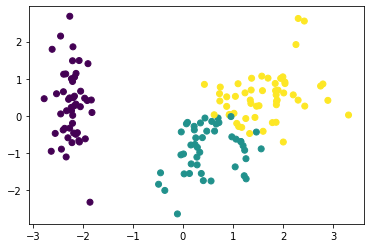

In [141]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels)

# Spektralno Bi-klasterovanje

Spektralno biklasterovanje je varijanta spektralnog klasterovanja koja se koristi za identifikaciju struktura (podskupova) podataka duž dve dimenzije istovremeno. Umesto da klasteruje samo po jednoj dimenziji (kao što su redovi u matrici podataka), biklasterovanje identifikuje povezane grupe i u redovima i u kolonama istovremeno. Ovo je posebno korisno u domenima gde se strukture u podacima formiraju u obe dimenzije, kao što je npr analitika podataka u genetskim ekspresijama.

Sastoji se iz sledećih koraka:

- Matrica podataka: Na primer, u bioinformatici, redovi bi mogli da predstavljaju gene, a kolone uslove pod kojima su geni izraženi. 

- Konstrukcija bipartitnog grafa: biklasterovanje gradi graf sa dve vrste čvorova, jedna vrsta predstavlja redove (npr. gene), a druga kolone (npr. uslove). Čvorovi su povezani ako je njihova sličnost visoka (ili ako postoji neka veza definisana u zadatku).

- Dalji koraci isti kao kod spektralnog klasterovaja

In [142]:
from sklearn.cluster import SpectralBiclustering

In [144]:
sbc = SpectralBiclustering(n_clusters=3, n_components=2, n_best=2)
sbc.fit(X_iris)

SpectralBiclustering(n_best=2, n_components=2)

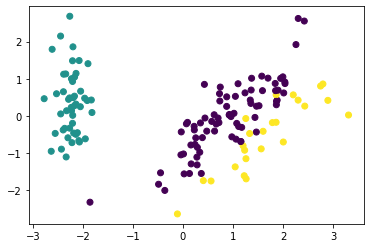

In [145]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=sbc.row_labels_)

In [146]:
silhouette_score(X_iris, sbc.row_labels_, metric='euclidean')

0.3264778243389548

In [147]:
homogeneity_score(labels_true=y, labels_pred=sbc.row_labels_)

0.5640320808558481

### Vestački primer podataka za potrebe spektralnog biklasterovanja:

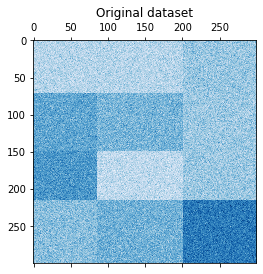

In [148]:
from matplotlib import pyplot as plt
from sklearn.datasets import make_checkerboard

n_clusters = (4, 3)
data, rows, columns = make_checkerboard(
    shape=(300, 300), n_clusters=n_clusters, noise=10, shuffle=False, random_state=42
)

plt.matshow(data, cmap=plt.cm.Blues)
plt.title("Original dataset")
_ = plt.show()

In [149]:
rng = np.random.RandomState(0)
row_idx_shuffled = rng.permutation(data.shape[0])
col_idx_shuffled = rng.permutation(data.shape[1])

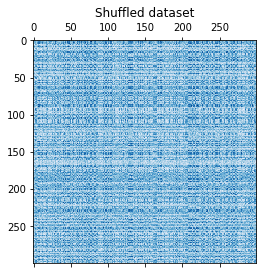

In [150]:
data = data[row_idx_shuffled][:, col_idx_shuffled]

plt.matshow(data, cmap=plt.cm.Blues)
plt.title("Shuffled dataset")
plt.show()

In [151]:
from sklearn.cluster import SpectralBiclustering
from sklearn.metrics import consensus_score

model = SpectralBiclustering(n_clusters=n_clusters, method="log", random_state=0)
model.fit(data)

score = consensus_score(
    model.biclusters_, (rows[:, row_idx_shuffled], columns[:, col_idx_shuffled])
)
print(f"consensus score: {score:.1f}")

consensus score: 1.0


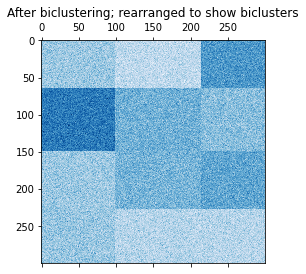

In [152]:
reordered_rows = data[np.argsort(model.row_labels_)]
reordered_data = reordered_rows[:, np.argsort(model.column_labels_)]

plt.matshow(reordered_data, cmap=plt.cm.Blues)
plt.title("After biclustering; rearranged to show biclusters")
_ = plt.show()

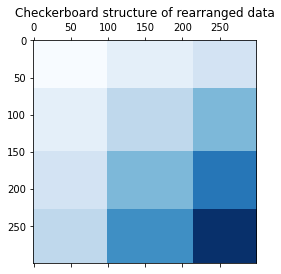

In [153]:
plt.matshow(
    np.outer(np.sort(model.row_labels_) + 1, np.sort(model.column_labels_) + 1),
    cmap=plt.cm.Blues,
)
plt.title("Checkerboard structure of rearranged data")
plt.show()

# Affinity Propagation

Propagacija afiniteta je algoritam klasterovanja koji radu po principu prosledjivanja "poruka" izmedju podataka. Kao rezultat svaki klaster je predstavljen jednom tačkom (predstavnikom) koja se nalazi u tom klasteru.

Algoritam se sastoji iz sledećih koraka:

- izračunavanje matrice sličnosti podataka, na osnovu odabrane metrike (npr. negativna vrednost euklidskog rastojanja)

- inicijalizacija matrice odgovornosti R i matrice dostupnosti A. Matrica R pokazuje koliko je svaka tačka dobra kao potencijalni predstavnik klastera. Matrica A pokazuje koliko je svaka tačka dostupna kao predstavnik klastera drugim tačkama.

- iterativno ažuriranje matrica R i A, prosleđivanjem poruka ogovornosti i dostupnosti

- nakon konvergiranja, tačke se dodeljuju najsličnijim predstavnicima

Pogledati: https://www.youtube.com/watch?v=DW4bi7XuRXg

In [154]:
from sklearn.cluster import AffinityPropagation

In [155]:
from sklearn import metrics
from sklearn.cluster import AffinityPropagation
from sklearn.datasets import make_blobs

Text(0.5, 1.0, 'Generated Data from Blobs')

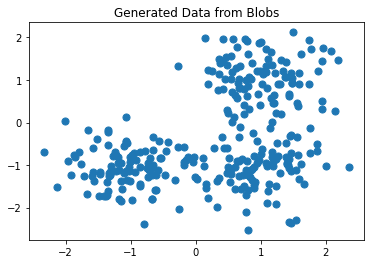

In [156]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=300, centers=centers, cluster_std=0.5, random_state=0
)
plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis')
plt.title('Generated Data from Blobs')

In [157]:
af = AffinityPropagation(preference=-50, random_state=0).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print("Estimated number of clusters: %d" % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print(
    "Silhouette Coefficient: %0.3f"
    % metrics.silhouette_score(X, labels, metric="sqeuclidean")
)

Estimated number of clusters: 3
Homogeneity: 0.872
Silhouette Coefficient: 0.753


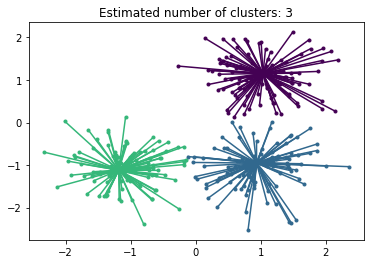

In [158]:
import matplotlib.pyplot as plt

plt.close("all")
plt.figure(1)
plt.clf()

colors = plt.cycler("color", plt.cm.viridis(np.linspace(0, 1, 4)))

for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.scatter(
        X[class_members, 0], X[class_members, 1], color=col["color"], marker="."
    )
    plt.scatter(
        cluster_center[0], cluster_center[1], s=14, color=col["color"], marker="o"
    )
    for x in X[class_members]:
        plt.plot(
            [cluster_center[0], x[0]], [cluster_center[1], x[1]], color=col["color"]
        )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

# BIRCH (Balanced Iterative Reducing and Clustering using Hierarchies)

Birch predstavlja algoritam hijerarhijskog klasterovanja, koji pruža visoku memorijsku efikasnost za velike skupove podataka. 
Algoritam kreira Clustering Feature Tree - CF stablo, tako da svaki čvor sadrži informacije o njegovim pod-klasterima, omogućavajući da se klasterovanje vrši samo na manjim skupovima podataka.

Algoritam može da se koristi u inkrementalnom režimu, što znači da može da se dodaju novi podaci bez potrebe za ponovnim klasterovanjem celog skupa podataka.
Ovo omogućava da BIRCH bude koristan za aplikacije u kojima se podaci kontinuirano generišu ili ažuriraju.

BIRCH se često koristi kao pretprocesor za druge algoritme klasterovanja. CF stabla koja se stvara može se koristiti kao ulaz za druge algoritme (poput K-means), čime se poboljšava brzina i efikasnost klasterovanja.

Svaki čvor u CF stablu sadrži tri ključna broja koja predstavljaju klaster podataka:

* N: Broj tačaka u podklasterima. To je ukupan broj tačaka koje čine taj klaster.
* LS (Linear Sum): Vektorska suma podataka, koja predstavlja zbir svih tačaka u klasteru. Ovaj vektor se koristi za izračunavanje centroida i sličnosti između klastera.
* SS (Squared Sum): Zbir kvadrata podataka, koji se koristi za izračunavanje varijanse i disperzije unutar klastera. Ova informacija je ključna za procenu unutrašnje strukture klastera.


<img src="assets/birch.png" alt="Alt tekst" width="600" height="450"/>

<img src="assets/cftree.png" alt="Alt tekst" width="600" height="450"/>

Procitati više o formiranju CF stabla: https://www.javatpoint.com/birch-in-data-mining

Primeri projekata za praktičnu primenu BIRCH algoritma:
- https://analyticsindiamag.com/developers-corner/hands-on-guide-to-image-classification-using-r/
- https://analyticsindiamag.com/developers-corner/guide-to-image-compositing-with-python-codes/

In [159]:
from sklearn.cluster import Birch

In [160]:
birch_model = Birch(threshold=1, branching_factor=20, n_clusters=None)
birch_model.fit(X)
labels = birch_model.predict(X)

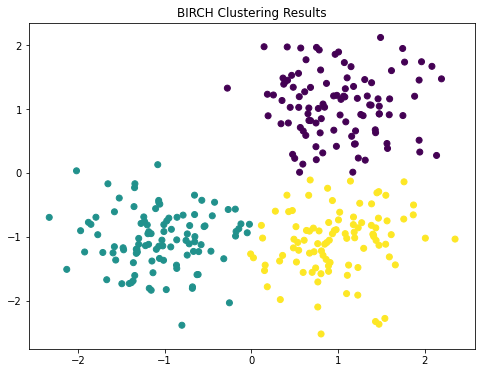

In [161]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title('BIRCH Clustering Results')
plt.show()

# Sakupljajuce hijerarhijsko klasterovanje

In [108]:
from sklearn.cluster import  AgglomerativeClustering

In [162]:
ac = AgglomerativeClustering(n_clusters=3, linkage='ward')
ac.fit(X_iris)

AgglomerativeClustering(n_clusters=3)

In [163]:
#ukoliko zelimo potpuno klasterovanje, kako bi iscrtali dendogram i sami odredili broj klastera
ac_full = AgglomerativeClustering(
    n_clusters=None, 
    distance_threshold=0, 
    linkage='ward'
)
fitted_ac_full = ac_full.fit(X_iris)

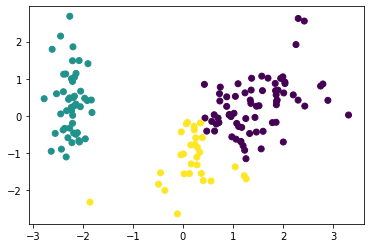

In [164]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=ac.labels_)

In [165]:
silhouette_score(X_iris, ac.labels_, metric='euclidean')

0.4466890410285909

In [167]:
homogeneity_score(labels_true=y_iris, labels_pred=ac.labels_)

0.6578818079976051

In [170]:
from scipy.cluster.hierarchy import dendrogram

In [173]:
# Funkcija za crtanje dendrigrama
# preuzeta sa: https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

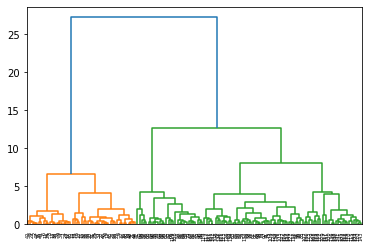

In [174]:
plot_dendrogram(fitted_ac_full)

Primer projekta sa praktičnom primenom Agglomerative Clustering:

* https://scikit-learn.org/dev/auto_examples/cluster/plot_coin_ward_segmentation.html#sphx-glr-auto-examples-cluster-plot-coin-ward-segmentation-py

Korisni linkovi: 

- OPTICS: https://scikit-learn.org/dev/modules/generated/sklearn.cluster.OPTICS.html

- HDBSCAN: https://hdbscan.readthedocs.io/en/latest/index.html

- Spectral Clustering: https://www.kaggle.com/code/vipulgandhi/spectral-clustering-detailed-explanation

- MiniBatchKMeans: https://scikit-learn.org/1.5/auto_examples/cluster/plot_mini_batch_kmeans.html#sphx-glr-auto-examples-cluster-plot-mini-batch-kmeans-py